In [0]:
import os, warnings
warnings.filterwarnings(action='ignore')
import pandas as pd
import numpy as np

# 1. Data Load

In [0]:

train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

# 2. Data Exploration

In [0]:
#shape / columns / 


# 3. Model Making

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
sel = ['PassengerId', 'Pclass', 'SibSp', 'Parch' ]

# 학습에 사용될 데이터 준비 X_train, y_train
X_train = train[sel]
y_train = train['Survived']
X_test = test[sel]

In [0]:
model = LogisticRegression()


In [0]:
model.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

# 5. Model Prediction


In [0]:
pred=model.predict(X_test)
pred[:15]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1])

In [0]:
sub=pd.read_csv('gender_submission.csv')

In [0]:
sub['Survived']=pred
sub.head(15)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,0
7,899,0
8,900,0
9,901,0


In [0]:
sub.to_csv('logistic_first_model.csv',index=False)

In [0]:
from sklearn.tree import DecisionTreeClassifier

In [0]:
decisiontree=DecisionTreeClassifier()
decisiontree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [0]:
pred2=decisiontree.predict(X_test)
pred2[:15]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1])

In [0]:
sub['Survived']=pred2
sub.head(15)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,0
7,899,1
8,900,0
9,901,0


In [0]:
sub.to_csv('decision_first_model.csv',index=False)

In [0]:
from sklearn.ensemble import RandomForestClassifier


In [0]:
randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
pred3=randomforest.predict(X_test)

In [0]:
pred3[:15]

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1])

In [0]:
sub['Survived']=pred3

In [0]:
sub.to_csv('Randomforest_first_model.csv',index=False)

In [0]:
plt.figure(figsize=(10,7))

NameError: ignored

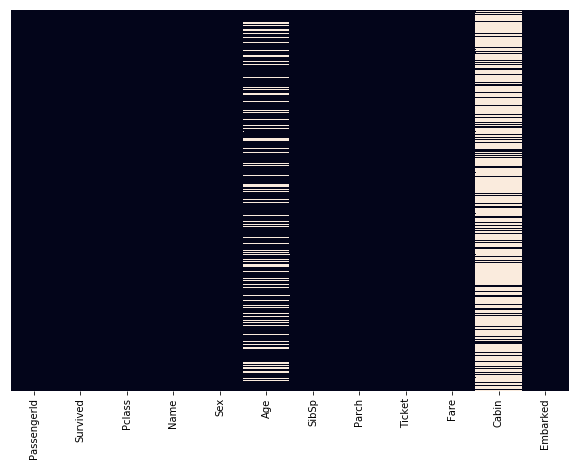

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,7))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False)  # cbar : colorbar를 그리지 않음.

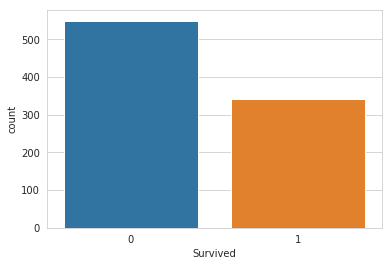

In [0]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train)

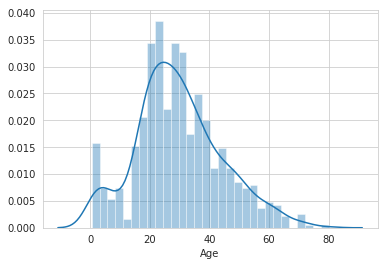

In [0]:
sns.distplot(train['Age'].dropna(), bins=30)


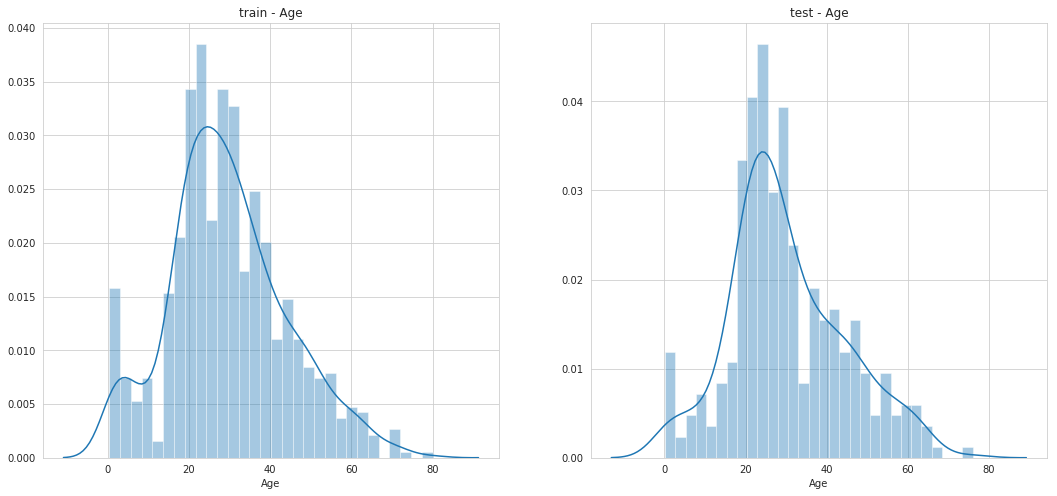

In [0]:
f,ax=plt.subplots(1,2,figsize=(18,8))

# 첫번째 그래프
sns.distplot(train['Age'].dropna(), bins=30,ax=ax[0])
ax[0].set_title('train - Age')

# 두번째 그래프 
sns.distplot(test['Age'].dropna(), bins=30,ax=ax[1])
ax[1].set_title('test - Age')
plt.show()

In [0]:
train['Age'] = train['Age'].fillna(train['Age'].mean())
test['Age'] = test['Age'].fillna(test['Age'].mean())

In [0]:
val_Embarked = train['Embarked'].value_counts()
val_Embarked

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [0]:
train['Embarked'] = train['Embarked'].fillna('S')

In [0]:
test['Fare'] = test['Fare'].fillna(test['Fare'].mean())

In [0]:
print( train['Sex'].value_counts() )
print( train['Embarked'].value_counts() )

male      577
female    314
Name: Sex, dtype: int64
S    646
C    168
Q     77
Name: Embarked, dtype: int64


In [0]:
train['Sex'] = train['Sex'].map( {'female': 0, 'male': 1} ).astype(int)  # 라벨 인코딩
test['Sex'] = test['Sex'].map( {'female': 0, 'male': 1} ).astype(int)    

train['Embarked'] = train['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
test['Embarked']= test['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [0]:
## 나이에 대한 int 처리
train['Age'] = train['Age'].astype('int')
test['Age'] = test['Age'].astype('int')

In [0]:
print(train.columns)
print(train.info())

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            891 non-null int64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null int64
dtypes: float64(1), int64(8), object(3)
memory usage: 83.6+ KB
None


In [0]:
sel = ['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'SibSp','Parch', 'Embarked' ]

# 학습에 사용될 데이터 준비 X_train, y_train
X_train = train[sel]
y_train = train['Survived']
X_test = test[sel]

In [0]:
from sklearn.tree import DecisionTreeClassifier
decisiontree = DecisionTreeClassifier(random_state=0)
decisiontree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [0]:
predictions = decisiontree.predict(X_test)
predictions[:15]

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1])

In [0]:
test_passengerId = test['PassengerId']
pred = predictions.astype(int)
df_pred = pd.DataFrame({'PassengerID':test_passengerId, 'Survived':pred})
df_pred.to_csv("decision_first_model.csv", index=False)

In [0]:
# 'Name', 'Ticket' =>  문자포함
sel = ['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'SibSp','Parch', 'Embarked', 'Fare' ]

# 학습에 사용될 데이터 준비 X_train, y_train
X_train = train[sel]
y_train = train['Survived']
X_test = test[sel]

In [0]:
from sklearn.tree import DecisionTreeClassifier
decisiontree = DecisionTreeClassifier()
decisiontree.fit(X_train, y_train)
# 예측
predictions = decisiontree.predict(X_test)
predictions[:15]

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1])

In [0]:
test_passengerId = test['PassengerId']
pred = predictions.astype(int)
df_pred = pd.DataFrame({'PassengerID':test_passengerId, 'Survived':pred})
df_pred.to_csv("decision_second_model.csv", index=False)